In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# %pwd

In [3]:
# %cd ../../../../Downloads/ERA_wind

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4AE8-67ED

 Directory of c:\Users\17735\Desktop\CAIS++\Wind_downscaling

04/18/2024  12:50 PM    <DIR>          .
03/31/2024  06:59 PM    <DIR>          ..
04/16/2024  09:06 AM                22 .gitignore
04/16/2024  09:34 AM    <DIR>          __pycache__
04/05/2024  10:38 AM           451,739 2nd_look.ipynb
04/18/2024  04:38 PM           647,457 cable_news_network.ipynb
04/18/2024  03:24 PM           455,765 cnn.ipynb
04/01/2024  11:31 AM             5,198 coarse_test.png
04/06/2024  01:06 PM           237,044 coarsen.ipynb
04/06/2024  12:24 PM    <DIR>          coarsened_array_outputs
04/06/2024  12:21 PM    <DIR>          coarsened_plot_outputs
03/27/2024  07:40 PM    <DIR>          ERA_wind
04/15/2024  07:31 AM           573,674 initial_look.ipynb
04/16/2024  05:44 PM           324,852 interpolate.ipynb
04/06/2024  01:06 PM            13,317 metrics.py
04/01/2024  11:31 AM           141,108 orig.png
04/06/2024  12:45 PM       

In [5]:
fine = np.load("ERA_wind\\ERA_wind.npz")

# Load

## Train

In [6]:
# %cd ../../OneDrive/Desktop/turb/proj-turbulence/train

In [7]:
cd train

c:\Users\17735\Desktop\CAIS++\Wind_downscaling\train


C:\Users\17735\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [8]:
# for lat in range(121)
#     for lon in range(201):
#         # the set of wind speeds at all time stamps at this one point
#         wind_speeds = [np.sqrt((u[i][1][lat][lon])**2 + (v[i][1][lat][lon])**2) for i in range (744)]

List comprehension of wind speeds at level 225

In [9]:
wind_v = fine["wind_v"][:744, 0, :120, :200]
wind_u = fine["wind_u"][:744, 0, :120, :200]

# wind_speeds = [[[np.sqrt((wind_u[i][1][lat][lon])**2 + (wind_v[i][1][lat][lon])**2) for lon in range(200)] for lat in range(120)] for i in range(744)]

wind_scalar = [np.sqrt(arr1**2 + arr2**2) for arr1, arr2 in zip(wind_v, wind_u)] # create array with wind scalar vales


In [10]:
len(wind_scalar), len(wind_scalar[0]), len(wind_scalar[0][0])

(744, 120, 200)

In [11]:
files = os.listdir(os.getcwd())

Add to coarse and fine lists in order

In [12]:
coarse_train = []
fine_train = []
for file in files: # loop thru files
    if file[0]=="w":
        timestamp = file[19:-4]
        coarse_train.append(np.load(file)) # load file, save into coarse
        fine_train.append(wind_scalar[int(timestamp)]) # load fine version

594 samples, # lat points, # lon points

In [13]:
len(coarse_train), len(coarse_train[0]), len(coarse_train[0][0])

(595, 15, 25)

In [14]:
len(fine_train), len(fine_train[0]), len(fine_train[0][0])

(595, 120, 200)

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [16]:
def scale_and_reshape(data, scaler):
    data_reshaped = np.array(data).reshape(len(data), -1)
    data_scaled = scaler.transform(data_reshaped)
    data_scaled_reshaped = data_scaled.reshape(len(data), *data[0].shape)
    return data_scaled_reshaped

In [17]:
fine_train_reshaped = np.array(fine_train).reshape(len(fine_train), -1)

In [18]:
coarse_train_reshaped = np.array(coarse_train).reshape(len(coarse_train), -1)

In [19]:
scaler = MinMaxScaler()
scaler.fit(fine_train_reshaped)

MinMaxScaler()

In [20]:
scaler_coarse = MinMaxScaler()
scaler_coarse.fit(coarse_train_reshaped)

MinMaxScaler()

In [21]:
coarse_train_scaled = scale_and_reshape(coarse_train, scaler_coarse)

In [22]:
fine_train_scaled = scale_and_reshape(fine_train, scaler)

In [23]:
print(fine_train_scaled.shape)

(595, 120, 200)


## Val

In [24]:
# %cd ../val

In [25]:
os.chdir('..')

In [26]:
%cd val

c:\Users\17735\Desktop\CAIS++\Wind_downscaling\val


C:\Users\17735\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [27]:
files = os.listdir(os.getcwd())
coarse_val = []
fine_val = []
for file in files: # loop thru files
    if file[0]=="w":
        timestamp = file[19:-4]
        coarse_val.append(np.load(file)) # load file, save into coarse
        fine_val.append(wind_scalar[int(timestamp)]) # load fine version

In [28]:
len(coarse_val), len(coarse_val[0]), len(coarse_val[0][0])

(75, 15, 25)

In [29]:
len(fine_val), len(fine_val[0]), len(fine_val[0][0])

(75, 120, 200)

In [30]:
coarse_val_scaled = scale_and_reshape(coarse_val, scaler_coarse)

In [31]:
fine_val_scaled = scale_and_reshape(fine_val, scaler)

In [32]:
print(fine_val_scaled.shape)

(75, 120, 200)


## Test

In [33]:
# %cd ../test

In [34]:
os.chdir('..')
%cd test

c:\Users\17735\Desktop\CAIS++\Wind_downscaling\test


C:\Users\17735\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [35]:
files = os.listdir(os.getcwd())
coarse_test = []
fine_test = []
for file in files: # loop thru files
    if file[0]=="w":
        timestamp = file[19:-4]
        coarse_test.append(np.load(file)) # load file, save into coarse
        fine_test.append(wind_scalar[int(timestamp)]) # load fine version

In [36]:
len(coarse_test), len(coarse_test[0]), len(coarse_test[0][0])

(74, 15, 25)

In [37]:
print(coarse_test[5])

[[25.04303186 26.39310889 27.36494655 29.65785032 32.22055326 33.32630805
  33.37246194 34.61099318 37.13970788 39.72730634 40.90226101 41.48452091
  42.61494029 44.16576451 45.13693037 46.5732021  49.05694332 50.27496869
  51.58525903 52.69943736 53.04804981 53.4440631  54.28885127 54.81258551
  54.95305098]
 [13.16594983 12.03936958 12.93712877 15.2655664  16.65232196 17.00458782
  20.85940758 24.73520382 27.82589078 31.89233014 35.3834316  37.63060344
  39.33295898 40.45967866 40.36332619 39.09575436 38.27238528 38.50807245
  39.1577114  40.02443823 41.52388765 43.21513242 44.53036442 45.53279665
  46.69174645]
 [ 9.21509564 11.05880324 12.293845   14.67005071 19.31968743 24.31154649
  27.00594305 27.37254684 27.98022932 27.23294807 25.24796559 23.92013517
  22.6628626  21.50350781 20.91698114 20.53948362 21.2988956  22.51087072
  25.38602026 28.87399224 31.36544049 33.39055287 34.70005436 35.45340014
  36.19902937]
 [19.14570109 21.70326651 25.81660329 28.0902463  25.87089563 23.60

In [38]:
len(fine_test), len(fine_test[0]), len(fine_test[0][0]), type(fine_test[0][0][0])

(74, 120, 200, numpy.float64)

In [39]:
coarse_test_scaled = scale_and_reshape(coarse_test, scaler_coarse)

In [40]:
fine_test_scaled = scale_and_reshape(fine_test, scaler)

## plot input data

In [41]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [42]:
lat = fine.get('lat')
lon = fine.get('lon')  
x_grid, y_grid = np.meshgrid(lon, lat, indexing='xy')
x_values = x_grid.flatten()
y_values = y_grid.flatten()

Text(0.5, 1.0, 'target')

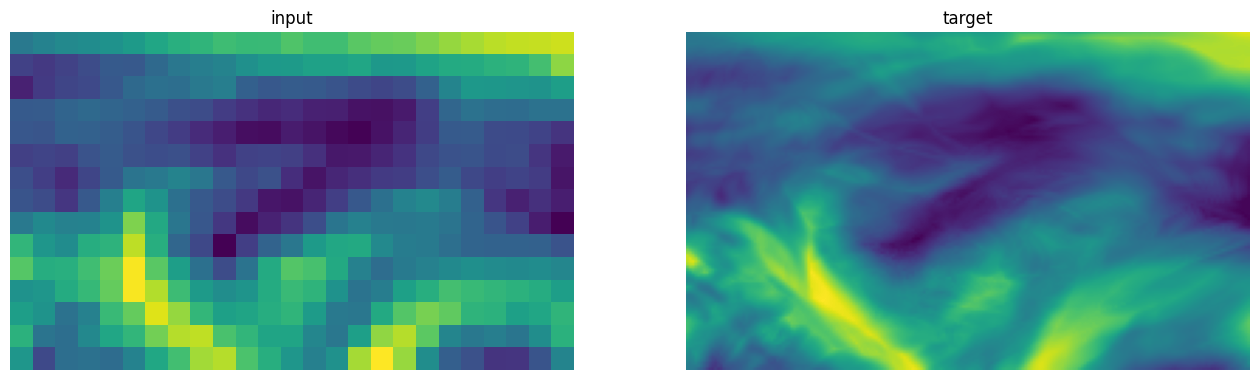

In [43]:
fig, axes = plt.subplots(1,2, figsize=(16,24))
axes[0].imshow(coarse_test_scaled[5])
axes[0].axis('off')
axes[0].set_title("input")
axes[1].imshow(fine_test_scaled[5])
axes[1].axis('off')
axes[1].set_title("target")

# CNN

In [44]:
%pip install torchvision

In [45]:
pip install --upgrade torch torchvision


^C
Note: you may need to restart the kernel to use updated packages.


In [47]:
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

c:\Users\17735\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\17735\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Load Data

In [48]:
class PairedImageDataset(Dataset):
    def __init__(self, coarse_images, high_res_images, transform=None):
        self.coarse_images = coarse_images
        self.high_res_images = high_res_images
        self.transform = transform

    def __len__(self):
        return len(self.coarse_images)

    def __getitem__(self, idx):
        coarse_img = self.coarse_images[idx]
        high_res_img = self.high_res_images[idx]

        if self.transform:
            coarse_img = self.transform(coarse_img)
            high_res_img = self.transform(high_res_img)

        return coarse_img, high_res_img

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

train = PairedImageDataset(np.array(coarse_train_scaled), np.array(fine_train_scaled), transform=transform)
test = PairedImageDataset(np.array(coarse_test_scaled), np.array(fine_test_scaled), transform=transform)
val = PairedImageDataset(np.array(coarse_val_scaled), np.array(fine_val_scaled), transform=transform)

# load
batch_size = 16
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=True)

In [49]:
print(fine_test_scaled[5])

[[0.39453137 0.39310171 0.40026151 ... 0.96589299 0.9679083  0.968553  ]
 [0.39632096 0.39737594 0.39869132 ... 0.94271683 0.9455482  0.94761413]
 [0.39684381 0.39657469 0.39598177 ... 0.91738845 0.9206815  0.92371707]
 ...
 [0.43558163 0.41805523 0.4321072  ... 0.38658018 0.41566739 0.46742962]
 [0.42546899 0.41021268 0.41331671 ... 0.36906572 0.40369932 0.43282384]
 [0.42063135 0.39828469 0.39532465 ... 0.34733816 0.36794326 0.38112642]]


In [50]:
print(coarse_test_scaled[5])

[[0.40608896 0.44773631 0.47481569 0.49037732 0.51398615 0.54913124
  0.5930067  0.63434438 0.65541203 0.69281691 0.67430947 0.67908104
  0.72710181 0.69555701 0.69656603 0.74674985 0.76473882 0.77275083
  0.80799776 0.84239575 0.87154589 0.89798961 0.90808773 0.91438382
  0.92486403]
 [0.19733829 0.16869194 0.19941959 0.23546415 0.28847935 0.28256286
  0.34382    0.40135667 0.43137031 0.44881472 0.50339931 0.54117412
  0.54819515 0.57395373 0.57455978 0.59518323 0.535158   0.54374639
  0.58178007 0.61265624 0.61563543 0.64597332 0.65158098 0.70280095
  0.83135442]
 [0.09462085 0.17342792 0.21125608 0.22329774 0.28019122 0.34557516
  0.37277222 0.36495327 0.40661013 0.42871954 0.31179352 0.2808194
  0.29479022 0.28552203 0.2624317  0.23353733 0.21264037 0.23745154
  0.31577029 0.45542071 0.53644568 0.53268575 0.5230881  0.51546868
  0.56187992]
 [0.28709964 0.2913569  0.32524916 0.34384481 0.33142101 0.31362043
  0.28944077 0.24935099 0.23572552 0.1830592  0.14767743 0.11665891
  0.131

In [51]:
np.array(coarse_train).shape, np.array(fine_train).shape

((595, 15, 25), (595, 120, 200))

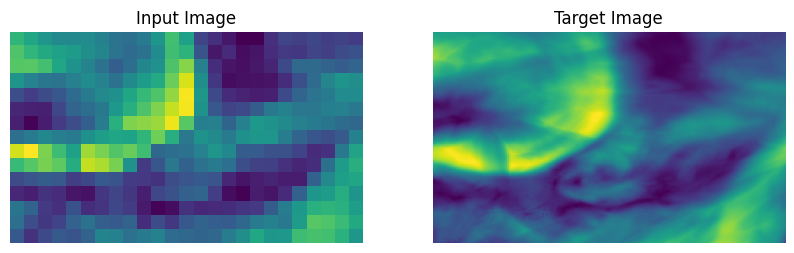

In [52]:
# Get one batch of samples from the training data
dataiter = iter(train_loader)
input_images, target_images = next(dataiter)

# Select one image from the batch
index = 0  # Choose the index of the image you want to plot
input_image = input_images[index]
target_image = target_images[index]

# Plot the input image and target image side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the input image
axes[0].imshow(input_image.squeeze())
axes[0].set_title('Input Image')
axes[0].axis('off')

# Plot the target image
axes[1].imshow(target_image.squeeze())
axes[1].set_title('Target Image')
axes[1].axis('off')

plt.show()

In [56]:
print(input_image.shape)

torch.Size([1, 15, 25])


In [55]:
print(input_image[0][0])
print(target_image[0][0])

tensor([0.6533, 0.5897, 0.5208, 0.4756, 0.4721, 0.4817, 0.4411, 0.3805, 0.3653,
        0.4166, 0.5299, 0.6964, 0.5708, 0.2101, 0.1390, 0.0663, 0.0010, 0.0040,
        0.1367, 0.2109, 0.1900, 0.2175, 0.1856, 0.1938, 0.1777],
       dtype=torch.float64)
tensor([0.5549, 0.5496, 0.5513, 0.5541, 0.5527, 0.5576, 0.5594, 0.5661, 0.5685,
        0.5705, 0.5711, 0.5713, 0.5682, 0.5626, 0.5569, 0.5568, 0.5594, 0.5581,
        0.5566, 0.5550, 0.5534, 0.5555, 0.5549, 0.5518, 0.5505, 0.5508, 0.5489,
        0.5445, 0.5449, 0.5403, 0.5340, 0.5327, 0.5303, 0.5270, 0.5211, 0.5143,
        0.5074, 0.5004, 0.4934, 0.4872, 0.4817, 0.4731, 0.4646, 0.4572, 0.4512,
        0.4439, 0.4413, 0.4321, 0.4276, 0.4244, 0.4223, 0.4216, 0.4222, 0.4216,
        0.4209, 0.4180, 0.4165, 0.4144, 0.4175, 0.4198, 0.4226, 0.4259, 0.4297,
        0.4378, 0.4457, 0.4527, 0.4593, 0.4650, 0.4715, 0.4802, 0.4878, 0.4952,
        0.5033, 0.5135, 0.5270, 0.5390, 0.5502, 0.5618, 0.5700, 0.5791, 0.5890,
        0.5972, 0.6067, 0.6

## Define CNN

In [58]:
class CNN(nn.Module):
    def __init__(self):
        upscale = 8
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, upscale**2, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.depth_to_space = nn.PixelShuffle(upscale)
        
    def forward(self, x):
        x = self.conv_layers(x.float())
        x = self.depth_to_space(x)
        return x
    
model = CNN()

## Train CNN

In [59]:
import torch
import math

In [77]:
criterion = nn.MSELoss()
optimizer = optim.NAdam(model.parameters(), lr=0.005)

absolute_percentage_errors = []
mape_list = []

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
#         inputs = inputs.squeeze()
        targets = targets.squeeze() 
#         print("shapes ", inputs.shape, targets.shape)
        outputs = model(inputs)
        loss = criterion(outputs, targets.squeeze().float())
        loss.backward()
        optimizer.step()
    # Validation
    model.eval()
    with torch.no_grad():
        total_mape = 0.0
        num_batches = 0
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loss = criterion(outputs, targets.squeeze())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')


Epoch 1/100, Loss: 0.04155244678258896, Val Loss: 0.04479443526712973
Epoch 2/100, Loss: 0.03756750375032425, Val Loss: 0.054761076691527855
Epoch 3/100, Loss: 0.0488450713455677, Val Loss: 0.04668864643633009
Epoch 4/100, Loss: 0.045295748859643936, Val Loss: 0.04885173704523558
Epoch 5/100, Loss: 0.045451290905475616, Val Loss: 0.046227621881125544
Epoch 6/100, Loss: 0.0443403460085392, Val Loss: 0.04614448485032333
Epoch 7/100, Loss: 0.061846308410167694, Val Loss: 0.04913246638185948
Epoch 8/100, Loss: 0.05055589973926544, Val Loss: 0.04674063590249931
Epoch 9/100, Loss: 0.043969422578811646, Val Loss: 0.04234234226164676
Epoch 10/100, Loss: 0.05546528846025467, Val Loss: 0.04501425000603442
Epoch 11/100, Loss: 0.04292388632893562, Val Loss: 0.0470190551008444
Epoch 12/100, Loss: 0.04754045605659485, Val Loss: 0.0446061758795555
Epoch 13/100, Loss: 0.04893193021416664, Val Loss: 0.0454288837607998
Epoch 14/100, Loss: 0.04512356221675873, Val Loss: 0.04517536309737849
Epoch 15/100, 

In [61]:
overall_mape = sum(mape_list) / len(mape_list)
print(f'Overall MAPE after training: {overall_mape}')

Overall MAPE after training: 2.0720350149171507


In [62]:
# mape_tensor = torch.cat(absolute_percentage_errors)
# mape = mape_tensor.mean().item() * 100
# print(f'Mean Absolute Percentage Error (MAPE) after training: {mape}')

RuntimeError: torch.cat(): expected a non-empty list of Tensors

In [ ]:
# print(mape_tensor)

tensor([[[[-1.0053, -1.0000, -1.0206,  ...,  0.9518,  0.9366,  0.9323],
          [-1.0095, -1.0000, -1.0092,  ...,  0.9229,  0.9483,  0.9386],
          [-1.0000, -1.0000, -1.0000,  ...,  0.9487,  0.9375,  0.9330],
          ...,
          [ 0.9832,  0.9966,  1.0000,  ...,  0.9491,  0.9541,  0.9521],
          [ 0.9776,  1.0000,  0.9918,  ...,  0.9594,  0.9501,  0.9556],
          [ 1.0000,  0.9961,  0.9872,  ...,  0.9261,  0.9835,  0.9322]]],


        [[[-1.0067, -1.0020, -1.0332,  ...,  0.9869,  0.9740,  0.9707],
          [-1.0279, -1.0000, -1.0230,  ...,  0.9668,  0.9827,  0.9750],
          [-1.0000, -1.0029, -1.0000,  ...,  0.9897,  0.9827,  0.9742],
          ...,
          [ 0.9935,  1.0000,  1.0000,  ...,  0.8351,  0.7359,  0.4890],
          [ 0.9899,  1.0000,  0.9925,  ...,  0.3865, -1.5586, -1.1512],
          [ 1.0000,  1.0000,  0.9922,  ..., -1.3130, -1.0413, -1.0859]]],


        [[[ 0.9002,  0.9446,  0.9154,  ...,  0.9263,  0.8549,  0.8293],
          [ 0.9228,  1.000

tensor([[[[0.3475, 0.3463, 0.3475,  ..., 0.3589, 0.3607, 0.3626],
          [0.3510, 0.3507, 0.3497,  ..., 0.3596, 0.3615, 0.3632],
          [0.3560, 0.3542, 0.3554,  ..., 0.3607, 0.3621, 0.3641],
          ...,
          [0.4182, 0.4552, 0.5139,  ..., 0.4004, 0.4053, 0.4124],
          [0.4261, 0.4660, 0.5188,  ..., 0.4002, 0.4056, 0.4083],
          [0.4387, 0.4724, 0.5267,  ..., 0.3998, 0.4025, 0.4008]]]])


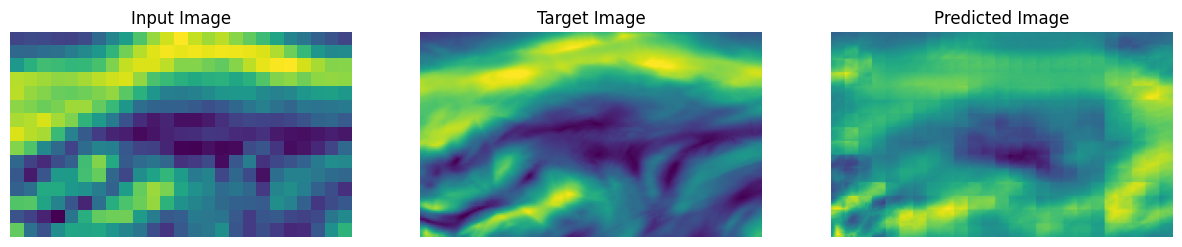

In [78]:
# Get one batch of samples from the training data
dataiter = iter(train_loader)
input_images, target_images = next(dataiter)

# Select one image from the batch
index = 0  # Choose the index of the image you want to plot
input_image = input_images[index]
target_image = target_images[index]

model.eval()

# Make prediction using the CNN model
with torch.no_grad():
    predicted_image = model(input_image.unsqueeze(0))  # Add an extra dimension for batch

print(predicted_image)

# Plot the input image, target image, and predicted image side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the input image
axes[0].imshow(input_image.squeeze())
axes[0].set_title('Input Image')
axes[0].axis('off')

# Plot the target image
axes[1].imshow(target_image.squeeze())
axes[1].set_title('Target Image')
axes[1].axis('off')

# Plot the predicted image
axes[2].imshow(predicted_image.squeeze())
axes[2].set_title('Predicted Image')
axes[2].axis('off')

plt.show()


In [72]:
print(target_image.shape)

torch.Size([1, 120, 200])


In [68]:
print(predicted_image.squeeze().shape)

torch.Size([120, 200])
